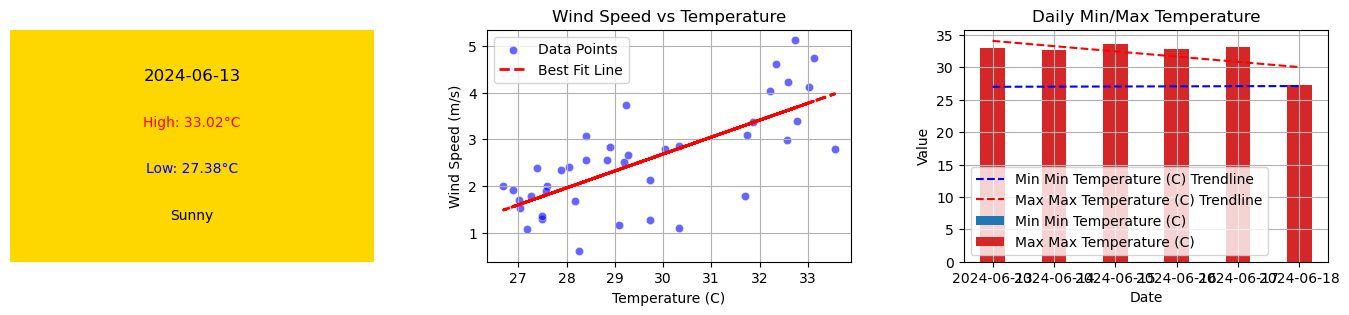

In [6]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import weather_plots as wp  # Assuming this contains your plotting functions
from fetch_data import fetch_weather_data
from process_data import process_weather_data

# Function to determine weather description
def determine_weather(row, sunny_threshold, rainy_min_temp_threshold, rainy_humidity_threshold):
    if row['Max Temperature (C)'] > sunny_threshold:
        return 'Sunny'
    elif row['Min Temperature (C)'] < rainy_min_temp_threshold and row['Max Humidity (%)'] > rainy_humidity_threshold:
        return 'Rainy'
    else:
        return 'Partly Cloudy'

# Function to update weather data and plots
def update_weather():
    city = city_var.get()
    api_key = '97490e98294c10e32022a2ef28d662fa'  # Replace with your OpenWeatherMap API key
    current_data, forecast_data = fetch_weather_data(api_key, city)
    current_df, hourly_df, daily_df = process_weather_data(current_data, forecast_data)
    daily_df['Weather'] = daily_df.apply(determine_weather, axis=1, args=(25, 15, 80))

    for widget in plot_frame.winfo_children():
        widget.destroy()
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    fig.tight_layout(pad=5.0)

    # Generate plots
    wp.create_forecast_card(axs[0], daily_df.iloc[0]['Date'], round(daily_df.iloc[0]['Max Temperature (C)'], 2), round(daily_df.iloc[0]['Min Temperature (C)'], 2), daily_df.iloc[0]['Weather'])
    wp.plot_scatter(hourly_df, 'Temperature (C)', 'Wind Speed (m/s)', axs[1], title="Wind Speed vs Temperature")
    wp.plot_min_max(daily_df, 'Date', 'Min Temperature (C)', 'Max Temperature (C)', axs[2], title="Daily Min/Max Temperature")

    canvas = FigureCanvasTkAgg(fig, master=plot_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Create the main Tkinter window
root = tk.Tk()
root.title("Weather Dashboard")

# Create a frame for the controls
control_frame = ttk.Frame(root, padding="10")
control_frame.grid(row=0, column=0, sticky=(tk.W, tk.E))

# Create a frame for the plots
plot_frame = ttk.Frame(root, padding="10")
plot_frame.grid(row=1, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Dropdown for city selection
city_var = tk.StringVar(value='Guangzhou')
city_dropdown = ttk.Combobox(control_frame, textvariable=city_var, values=['Guangzhou', 'New York', 'London', 'Beijing'])
city_dropdown.grid(row=0, column=0, padx=5, pady=5)

# Button to fetch and update weather data
update_button = ttk.Button(control_frame, text="Update Weather", command=update_weather)
update_button.grid(row=0, column=1, padx=5, pady=5)

# Configure row and column weights
root.grid_rowconfigure(1, weight=1)
root.grid_columnconfigure(0, weight=1)
plot_frame.grid_rowconfigure(0, weight=1)
plot_frame.grid_columnconfigure(0, weight=1)

# Initialize the weather data
update_weather()

# Start the Tkinter event loop
root.mainloop()